Text taken from the Kaggle database describing the data:

Content
Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.
This is the link to the survey.

Acknowledgements
Authentic-Happiness.com
360living.co
guidebienetre.org

Inspiration
Which new insights can we extract to reinvent our lifestyles and optimize our individual wellbeing?
What are the strongest correlations between the various dimensions?
What are the best predictors of a balanced life?
This study supports the following UN Sustainable Development Goals:

8.4 Improve global resource efficiency in consumption and production and endeavour to decouple economic growth from environmental degradation
12.8 Ensure that people everywhere have the relevant information and awareness for sustainable development and lifestyles in harmony with nature
12.8.1 Extent to which (i) global citizenship education and (ii) education for sustainable development (including climate change education) are mainstreamed in (a) national education policies; (b) curricula; (c) teacher education; and (d) student assessment

In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
df = pd.read_csv("data/Wellbeing_and_lifestyle_data_Kaggle.csv")

In [3]:
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [5]:
df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


Based on the info below no data is missing.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [7]:
df.corr()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.000000,0.254889,0.157774,0.204461,0.106941,0.162902,0.199457,-0.092967,0.227005,0.133073,0.251213,0.110105,0.103627,-0.074100,-0.072916,0.148239,0.167818,0.164572,0.196087,0.452255
PLACES_VISITED,0.254889,1.000000,0.255877,0.237847,0.149253,0.257917,0.204478,-0.108139,0.227652,0.138559,0.196110,0.143699,0.127311,-0.129300,-0.092050,0.176612,0.269582,0.177729,0.209342,0.529615
CORE_CIRCLE,0.157774,0.255877,1.000000,0.337718,0.308657,0.289417,0.221758,-0.026055,0.224361,0.237885,0.148006,0.219937,0.066388,-0.080940,-0.066530,0.123063,0.253846,0.227632,0.105337,0.507541
SUPPORTING_OTHERS,0.204461,0.237847,0.337718,1.000000,0.316265,0.360086,0.393212,0.038655,0.256691,0.278600,0.147592,0.236693,0.007051,-0.018090,-0.048353,0.113384,0.332744,0.327846,0.144171,0.548851
SOCIAL_NETWORK,0.106941,0.149253,0.308657,0.316265,1.000000,0.249040,0.156867,0.019927,0.204437,0.244724,0.215797,0.182483,-0.029722,0.016641,-0.000102,0.123675,0.209119,0.200631,-0.006708,0.412586
ACHIEVEMENT,0.162902,0.257917,0.289417,0.360086,0.249040,1.000000,0.233713,-0.019670,0.304973,0.386572,0.185947,0.320673,0.045240,0.000771,-0.044503,0.113791,0.396186,0.368939,0.164670,0.561244
DONATION,0.199457,0.204478,0.221758,0.393212,0.156867,0.233713,1.000000,0.064630,0.193843,0.172625,0.113417,0.164831,-0.001410,-0.022135,-0.046957,0.120625,0.277812,0.193160,0.144073,0.458829
BMI_RANGE,-0.092967,-0.108139,-0.026055,0.038655,0.019927,-0.019670,0.064630,1.000000,-0.061498,0.026909,-0.131451,0.000070,-0.098215,0.036822,0.060412,-0.011816,0.019109,-0.006108,-0.078286,-0.251988
TODO_COMPLETED,0.227005,0.227652,0.224361,0.256691,0.204437,0.304973,0.193843,-0.061498,1.000000,0.301271,0.200432,0.269874,0.113609,-0.078463,-0.135584,0.203842,0.247062,0.274471,0.182552,0.545503
FLOW,0.133073,0.138559,0.237885,0.278600,0.244724,0.386572,0.172625,0.026909,0.301271,1.000000,0.143737,0.305978,0.029893,0.006212,-0.062331,0.077805,0.221226,0.483433,0.140836,0.478199


In [47]:
df["SUFFICIENT_INCOME"].value_counts(1)

2    0.728963
1    0.271037
Name: SUFFICIENT_INCOME, dtype: float64

In [10]:
from sklearn.model_selection import cross_val_score


In [11]:
# we can first score our model through cross validation (applicable to any supervised model we learn)
cross_val_score(model, X_train, Y_train, cv=5)


NameError: name 'model' is not defined

In [12]:
import seaborn as sns

Given no other information we could predict that all people have sufficient income. We would be right 72.9% of the time

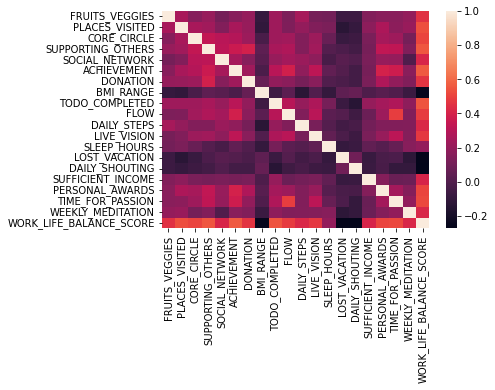

In [13]:
ax = sns.heatmap(df.corr())

In [14]:
df["GENDER"].value_counts()

Female    9858
Male      6114
Name: GENDER, dtype: int64

In [15]:
df["AGE"].value_counts()

21 to 35        6108
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: AGE, dtype: int64

In [16]:
df['GENDER'].replace({'Male':0.0, 'Female':1.0}, inplace = True)
df['AGE'].replace({"Less than 20": 0.0, '21 to 35':1.0, '36 to 50':2.0, "51 or more": 3.0}, inplace = True)

In [17]:
df['DAILY_STRESS'].value_counts()
#one data point looks like a time stamp instead. Will need to replace this 
#I changed the date stamp to 3 as it is the mean and mode of the column

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: DAILY_STRESS, dtype: int64

In [18]:
df['DAILY_STRESS'].replace({'0':0.0, '1':1.0, "2": 2.0, "3": 3.0, "4": 4.0, "5": 5, "1/1/00": 3.0}, inplace = True)


In [19]:
df['DAILY_STRESS'].value_counts()

3.0    4399
2.0    3407
4.0    2960
1.0    2478
5.0    2052
0.0     676
Name: DAILY_STRESS, dtype: int64

In [20]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [21]:
df.corr()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.000000,-0.094535,0.254889,0.157774,0.204461,0.106941,0.162902,0.199457,-0.092967,0.227005,...,0.103627,-0.074100,-0.072916,0.148239,0.167818,0.164572,0.196087,0.176860,0.110201,0.452255
DAILY_STRESS,-0.094535,1.000000,-0.134863,-0.120244,-0.029837,0.020940,-0.110939,-0.037707,0.083118,-0.163726,...,-0.157042,0.196948,0.302657,-0.144565,-0.042519,-0.158110,-0.218659,-0.027386,0.122566,-0.365394
PLACES_VISITED,0.254889,-0.134863,1.000000,0.255877,0.237847,0.149253,0.257917,0.204478,-0.108139,0.227652,...,0.127311,-0.129300,-0.092050,0.176612,0.269582,0.177729,0.209342,0.004299,0.042759,0.529615
CORE_CIRCLE,0.157774,-0.120244,0.255877,1.000000,0.337718,0.308657,0.289417,0.221758,-0.026055,0.224361,...,0.066388,-0.080940,-0.066530,0.123063,0.253846,0.227632,0.105337,0.007571,0.096570,0.507541
SUPPORTING_OTHERS,0.204461,-0.029837,0.237847,0.337718,1.000000,0.316265,0.360086,0.393212,0.038655,0.256691,...,0.007051,-0.018090,-0.048353,0.113384,0.332744,0.327846,0.144171,0.187305,0.131354,0.548851
SOCIAL_NETWORK,0.106941,0.020940,0.149253,0.308657,0.316265,1.000000,0.249040,0.156867,0.019927,0.204437,...,-0.029722,0.016641,-0.000102,0.123675,0.209119,0.200631,-0.006708,-0.053216,0.040925,0.412586
ACHIEVEMENT,0.162902,-0.110939,0.257917,0.289417,0.360086,0.249040,1.000000,0.233713,-0.019670,0.304973,...,0.045240,0.000771,-0.044503,0.113791,0.396186,0.368939,0.164670,0.008728,-0.000627,0.561244
DONATION,0.199457,-0.037707,0.204478,0.221758,0.393212,0.156867,0.233713,1.000000,0.064630,0.193843,...,-0.001410,-0.022135,-0.046957,0.120625,0.277812,0.193160,0.144073,0.231975,0.118644,0.458829
BMI_RANGE,-0.092967,0.083118,-0.108139,-0.026055,0.038655,0.019927,-0.019670,0.064630,1.000000,-0.061498,...,-0.098215,0.036822,0.060412,-0.011816,0.019109,-0.006108,-0.078286,0.197041,0.010670,-0.251988
TODO_COMPLETED,0.227005,-0.163726,0.227652,0.224361,0.256691,0.204437,0.304973,0.193843,-0.061498,1.000000,...,0.113609,-0.078463,-0.135584,0.203842,0.247062,0.274471,0.182552,0.104309,0.081388,0.545503


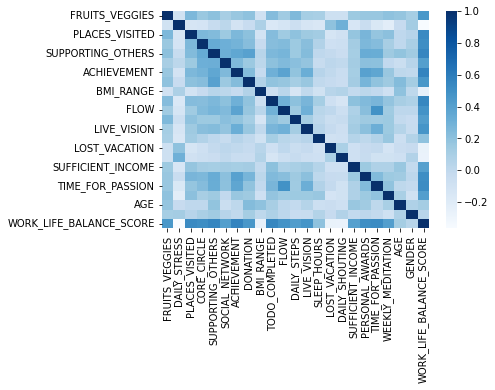

In [48]:

ax = sns.heatmap(df.corr(), cmap='Blues')
plt.show()


In [22]:
X = df.drop(["SUFFICIENT_INCOME", "Timestamp"], axis = 1)
#Am dropping Timestamp as it is irrelevant
y = df["SUFFICIENT_INCOME"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


This Dummy Classifier matches what we would expect, simply based on percent above.

In [26]:
base_model = DummyClassifier(strategy="most_frequent")

In [27]:
base_model.fit(X_train, y_train)
base_model.score(X_test, y_test)


0.730778863010268

In [28]:
cross_val_score(base_model, X_train, y_train, cv=5)

array([0.72829716, 0.72829716, 0.72829716, 0.72829716, 0.72860125])

In [29]:
base_model2 = DummyClassifier(strategy="stratified")

In [30]:
base_model2.fit(X_train, y_train)
base_model2.score(X_test, y_test)

0.6078136739293765

Stratified strategy gives a lower number of people meeting sufficient and is less predictive than the Most Frequent strategy because we know it is not 60% and we are not using any other predictor

In [31]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.7703481091910844

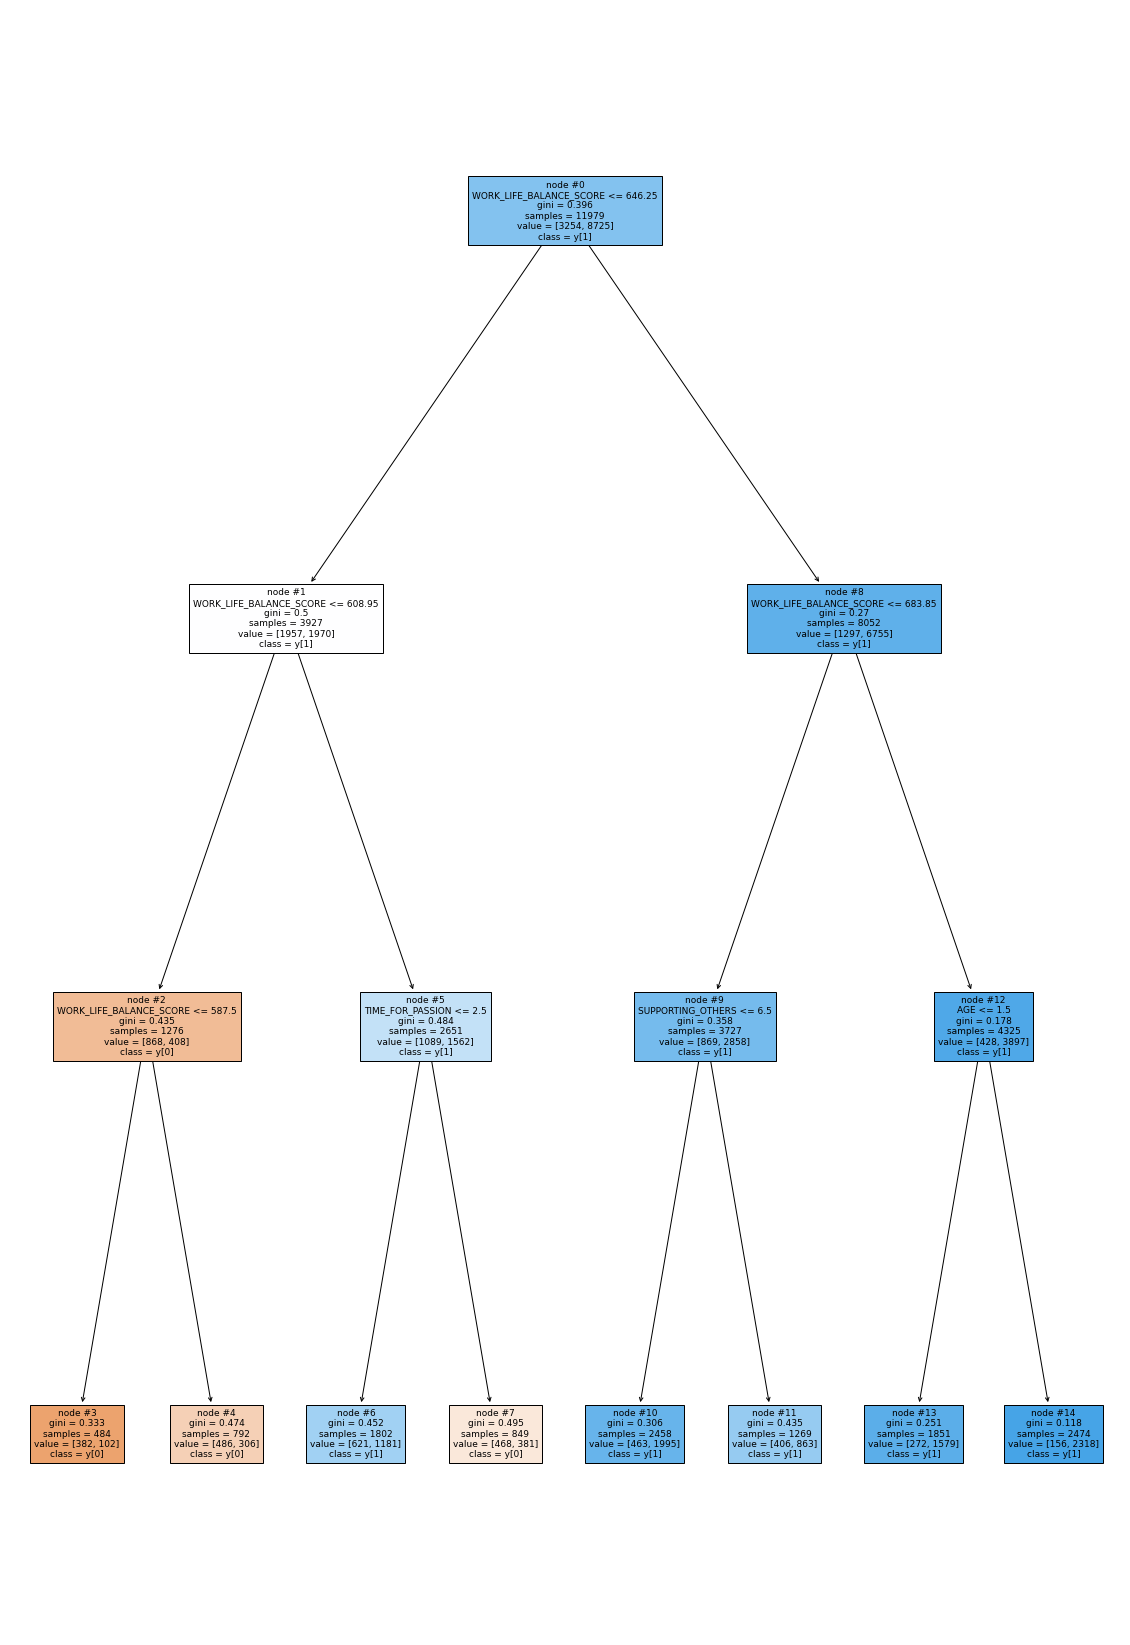

In [44]:
from sklearn import tree
plt.figure(figsize=(20,30))
tree.plot_tree(dt_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()


In [33]:
cross_val_score(dt_model, X_train, y_train, cv=5)

array([0.77754591, 0.78088481, 0.76252087, 0.76711185, 0.75991649])

In [50]:
cross_val_score(dt_model, X_train, y_train, cv=5).mean()

0.769595986351644

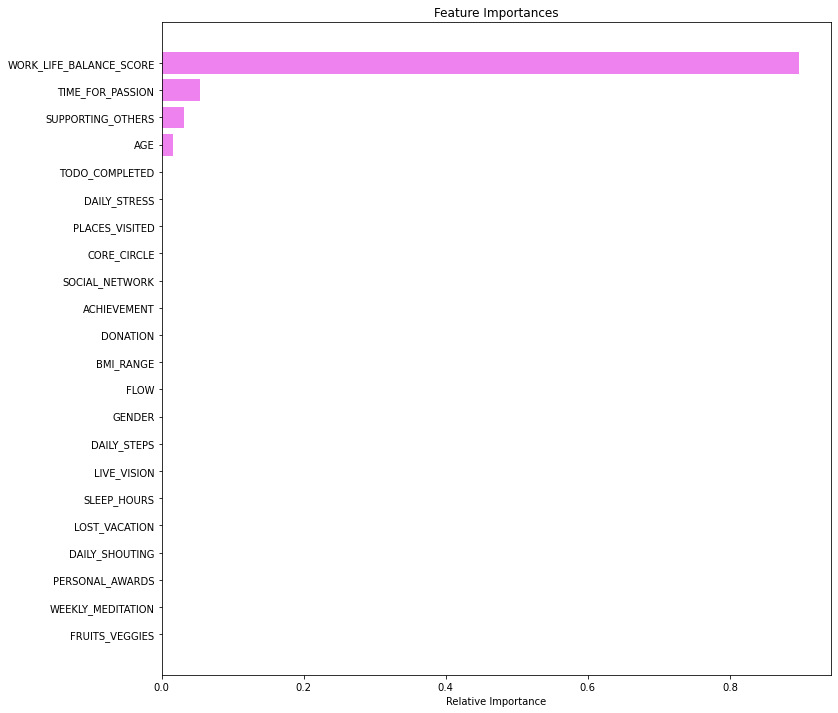

In [34]:
feature_names = list(X.columns)

importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
result = dt_model.score(X_test, y_test)
predicted = dt_model.predict(X_test)
report = classification_report(y_test, predicted) 
print(result)
print(report)

0.7703481091910844
              precision    recall  f1-score   support

           1       0.62      0.38      0.47      1075
           2       0.80      0.91      0.85      2918

    accuracy                           0.77      3993
   macro avg       0.71      0.65      0.66      3993
weighted avg       0.75      0.77      0.75      3993



In [38]:
cross_val_score(lr_model, X_train, y_train, cv=5)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([1., 1., 1., 1., 1.])

In [39]:
lr_model = LogisticRegression(max_iter = 100, random_state=42)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7427998998246932

In [40]:
lr_model = LogisticRegression(max_iter = 500, random_state=42)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8216879539193589

In [53]:
lr_model = LogisticRegression(max_iter = 800, random_state=42)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [54]:
lr_model = LogisticRegression(max_iter = 1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [42]:
result = lr_model.score(X_test, y_test)
predicted = lr_model.predict(X_test)
report = classification_report(y_test, predicted) 
print(result)
print(report)


1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1075
           2       1.00      1.00      1.00      2918

    accuracy                           1.00      3993
   macro avg       1.00      1.00      1.00      3993
weighted avg       1.00      1.00      1.00      3993



TypeError: 'LogisticRegression' object is not subscriptable

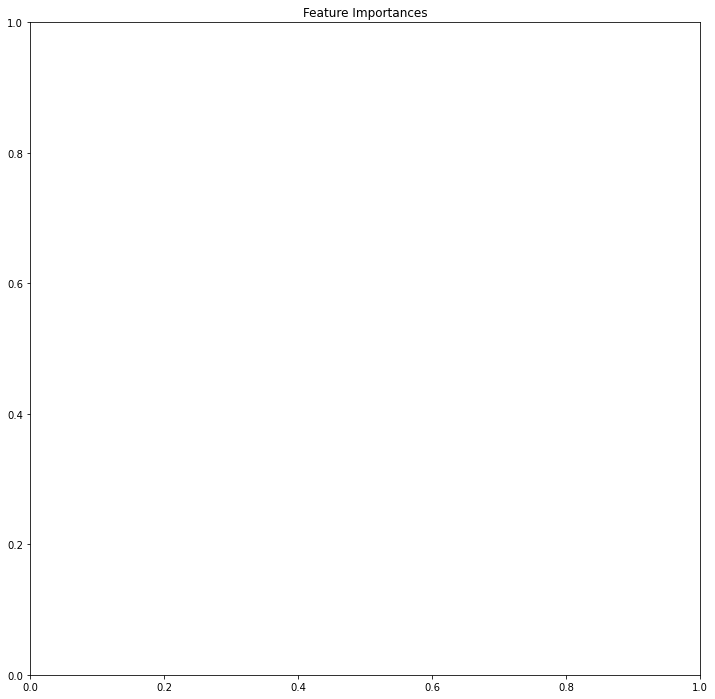

In [52]:
feature_names = list(X.columns)

importances = lr_model
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
